# 第4章 便捷函数
2017-07-23 王斌 python3 测试时间：   分数：

本章涵盖以下内容:
 数据选取;
 简单数据分析;
 收益率相关性;
 多项式;
 线性代数的计算函数。

np.cov(bhp_returns, vale_returns)		#计算协方差（归一化前的相关系数）

A.diagonal()		#矩阵对角线元素

A.trace()		#矩阵的迹

np.corrcoef(bhp_returns, vale_returns)		#计算相关系数矩阵

poly=np.polyfit(t, bhp_close - vale_close, N)		#多项式拟合

np.polyval(poly,t)		#将x的值赋值为t，再带入多项式中进行计算，相当于f(x)的结果

der = np.polyder(poly)		#多项式求导

np.roots(der)		#求解多项式的根，这里就是多项式极值点（因为der是求导后的解）

np.sign(change)		#获取change的符号

np.piecewise(change, [change < 0, change == 0,change > 0], [-1,0, 1])	#条件映射

np.array_equal(signs, pieces)	#判断两个数组是否相同

func = np.vectorize(calc_profit)	#构造函数指针，calc_profit本身是一个函数 profits = func(o, h, l, c)

profits[profits != 0]		#对元素值做条件筛选，相当于profits[np.where(profits!=0)]

weights = np.hanning(N)		#权重值

np.isreal(xpoints)		#判断是否都是实数（非复数）

np.trim_zeros(xpoints)		#去掉一维数组中开头和末尾为0的 元素

np.polysub(poly_bhp, poly_vale)		#对多项式系数做减法，得到的还是多项式的系数
				
#类似的：polydiv多项式除法, polymul多项式乘法, polyadd多项式加法



In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 4.1 相关性

我们将使用2个示例数据集提供收盘价数据,其中包含收盘价的最小值。
第一家公司是BHP Billiton(BHP),其主要业务是石油、金属和钻石的开采。第二家公司是Vale
(VALE),也是一家金属开采业的公司。因此,这两家公司有部分业务是重合的,尽管不是100%
相同。按照如下步骤分析它们股票的相关性。

(1) 首先,从CSV文件(本章示例代码文件夹中)中读入两只股票的收盘价数据,并计算收
益率。如果你不记得该怎样做,在前一章中有很多可以参阅的例子。

(2) 协方差描述的是两个变量共同变化的趋势,其实就是归一化前的相关系数。使用 cov 函
数计算股票收益率的协方差矩阵(并非必须这样做,但我们可以据此展示一些矩阵操作的方法)
。

In [2]:
#获取收盘价
bhp_close = np.loadtxt('BHP.csv',delimiter=',',usecols=(6))
vale_close = np.loadtxt('VALE.csv',delimiter=',',usecols=(6))

#计算收益率
bhp_returns = 
vale_returns =  

bhp_returns
vale_returns

#计算两个收益率之间的协方差（归一化前的相关系数）
covariance =  
covariance

array([ 0.02048656, -0.01129235, -0.01332487,  0.00675241, -0.01639519,
       -0.00303063,  0.00271415, -0.00649632,  0.02343069,  0.00734746,
       -0.0140592 ,  0.01243701,  0.01683787, -0.00270777, -0.01347118,
       -0.0013761 , -0.02247191, -0.04239861,  0.01449439, -0.00636232,
       -0.0232532 , -0.02380679,  0.02945335,  0.01350423,  0.01163053,
       -0.00982252,  0.01476722,  0.01377472, -0.00646504])

array([ 0.02211231,  0.00028466,  0.00483779,  0.00736335, -0.01518133,
       -0.04538967,  0.01495215,  0.00795522,  0.00175387, -0.0011672 ,
       -0.01373065,  0.01658768,  0.01602564, -0.01061084, -0.03681159,
        0.0018056 , -0.01231601, -0.02950122,  0.00814792,  0.00839291,
       -0.01633785, -0.02726418,  0.01514175,  0.01999365,  0.00871189,
       -0.00524368,  0.01395349, -0.01039755, -0.00061805])

array([[ 0.00028179,  0.00019766],
       [ 0.00019766,  0.00030123]])

(3) 使用 diagonal 函数查看对角线上的元素

(4) 使用 trace 函数计算矩阵的迹,即对角线上元素之和

In [3]:
"协方差对角线",covariance. ()
"协方差的迹",covariance. ()

('协方差对角线', array([ 0.00028179,  0.00030123]))

('协方差的迹', 0.00058302354992027826)

(5) 两个向量的相关系数被定义为协方差除以各自标准差的乘积。

In [4]:
"用协方差计算相关系数矩阵（有偏）",
"用协方差计算相关系数矩阵（无偏）",
#注意这两个结果的不同，并且和步骤（6）中的结果进行对比。


('用协方差计算相关系数矩阵（有偏）', array([[ 1.00173366,  0.70264666],
        [ 0.70264666,  1.0708476 ]]))

('用协方差计算相关系数矩阵（无偏）', array([[ 0.96719112,  0.67841747],
        [ 0.67841747,  1.03392182]]))

我们知道,相关系数矩阵的主对角线元素为随机变量与自身的相关系数,应该等于1。
因此这一步得到的矩阵并非相关系数矩阵,而下一步中的才是。
读者可能有这样的疑问,为何这里按照相关系数的定义手动计算出来的矩阵并非相关系数矩阵呢?
主要有两点原因:(1) 分母不应为定值,而要根据分子上的协方差计算对象确定。
以左上角的元素为例,由于其分子为 cov(a, a) ,即随机变量a和其自身的协方差,
则分母对应为 (bhp_returns.std() * bhp_returns.std()) 。其他位置的元素计算同理。
(2) 即使按照这一步给出的算式,副对角线上的元素也应该是正确的相关系数,但为何与下一步中的副对角线仍不一致呢?
这是由于NumPy在计算协方差时,自由度参数默认为 1 ,即分母为N-1而不是N,从而求得总体协方差的无偏估计。
而调用 .std() 计算标准差时,自由度参数默认为 0 ,从而求得的是样本标准差,而非总体标准差的无偏估计。
因此,这一步计算的副对角线元素也并非正确的相关系数。译者测试了作者提供的源代码,
如果在调用 .std() 方法时指定 ddof=1 ,即自由度设为 1 ,就可以得到与下一步计算结果相同的副对角线元素。
如前所述,若分别计算各个元素的分母,即可得到主对角线为1、完全正确的相关系数矩阵。

(6) 我们将用相关系数函数corrcoef()来度量这两只股票的相关程度。

In [5]:
"直接计算相关系数矩阵"
np.corrcoef(bhp_returns, vale_returns)

'直接计算相关系数矩阵'

array([[ 1.        ,  0.67841747],
       [ 0.67841747,  1.        ]])

(7) 另外一个要点是判断两只股票的价格走势是否同步。如果它们的差值偏离了平均差值2
倍于标准差的距离,则认为这两只股票走势不同步。

In [6]:
difference =  
avg =    #均值
dev =     #标准差
print("同步？",  ) 
#bhp和vale的差值 大于平均差值的2倍标准差，则不同步。

同步？ False


(8) 绘图比较

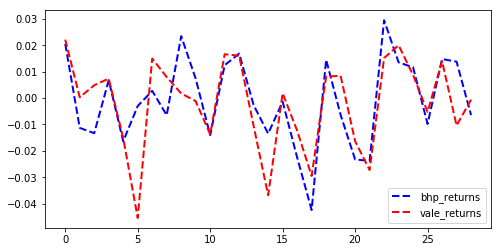

In [7]:
#对比收益率曲线
import matplotlib.pylab as plt

%matplotlib inline

t = np.arange(len(bhp_returns))

plt.figure(figsize=(8,4))

plt.plot(t,bhp_returns,"b--",lw=2.0,label="bhp_returns")

plt.plot(t,vale_returns,"r--",lw=2.0,label="vale_returns")

plt.legend()

plt.show()

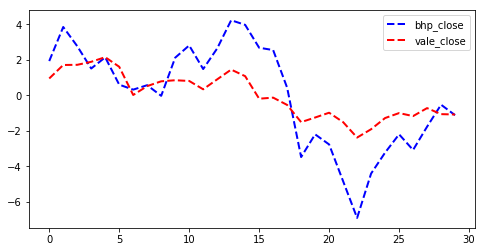

In [8]:
#对比价格走势，都同时减去各自价格的均值。
import matplotlib.pylab as plt

%matplotlib inline

t = np.arange(len(bhp_close))

plt.figure(figsize=(8,4))

plt.plot(t,bhp_close-np.mean(bhp_close),"b--",lw=2.0,label="bhp_close")

plt.plot(t,vale_close-np.mean(vale_close),"r--",lw=2.0,label="vale_close")

plt.legend()

plt.show()

## 4.3 多项式拟合
微积分里有泰勒展开的概念,也就是用一个无穷级数来表
示一个可微的函数。实际上,任何可微的(从而也是连续的)函数都可以用一个N次多项式来估
计,而比N次幂更高阶的部分为无穷小量可忽略不计

NumPy中的 ployfit 函数可以用多项式去拟合一系列数据点,无论这些数据点是否来自连续函数都适用。

(1) 我们继续使用BHP和VALE的股票价格数据。**用一个N次多项式去拟合两只股票收盘价的
差价**

In [9]:
N = 8  #用N次多项式拟合差价
t = np.arange(len(bhp_close))
poly =  #多项式拟合两只股票的价差
"多项式拟合结果"
poly

'多项式拟合结果'

array([  1.34593569e-08,  -1.50561087e-06,   6.44426317e-05,
        -1.28650343e-03,   1.11347718e-02,  -1.82667697e-02,
        -1.68801776e-01,   1.75860154e-01,   5.96960158e+01])

(2) 上面看到的那些数字就是多项式的系数。用我们刚刚得到的多项式对象以及 polyval 函
数,就可以推断下一个值

In [10]:
t[-1]


29

58.632243978040286

(3) 理想情况下,BHP和VALE股票收盘价的差价越小越好。在极限情况下,差值可以在某个
点为0。使用 roots 函数找出我们拟合的多项式函数什么时候到达0值

In [11]:
'解出多项式的根为'


'解出多项式的根为'

array([ 33.60779625+4.43938101j,  33.60779625-4.43938101j,
        22.47933332+9.54835782j,  22.47933332-9.54835782j,
         5.47392594+9.89317418j,   5.47392594-9.89317418j,
        -5.62930193+4.35016079j,  -5.62930193-4.35016079j])

(4) 我们在微积分课程中还学习过求极值的知识——极值可能是函数的最大值或最小值。
记住微积分中的结论,这些极值点位于函数的导数为0的位置。使用 polyder 函数对多项式函
数求导:

In [12]:
der = 
print('多项式求导结果(函数系数)：',der)

多项式求导结果(函数系数)： [  1.07674855e-07  -1.05392761e-05   3.86655790e-04  -6.43251713e-03
   4.45390873e-02  -5.48003091e-02  -3.37603552e-01   1.75860154e-01]


(5) 求出导数函数的根,即找出原多项式函数的极值点:

(6) 现在,使用 argmax 和 argmin 找出拟合结果中的最大值点和最小值点


In [13]:
print('多项式拟合的极值点位于：',)

vals =     #计算拟合结果
print('拟合结果的最大值点位于：',np.argmax(vals))
print('拟合结果的最小值点位于：',np.argmin(vals))

print('真实结果的最大最小值点位于：',np.argmax(bhp_close-vale_close),np.argmin(bhp_close-vale_close))

多项式拟合的极值点位于： [ 29.07457982+0.61254521j  29.07457982-0.61254521j  22.15034246+0.j
  13.31424737+0.j           5.97914480+0.j          -2.20828132+0.j
   0.49595583+0.j        ]
拟合结果的最大值点位于： 13
拟合结果的最小值点位于： 22
真实结果的最大最小值点位于： 14 22


借机计算下两者的差异，通过前面学习，考虑一个拟合的好坏，应该就是考虑与真实值的差异大小，差异越小，差异波动越小，则结果越好。考虑计算他们差异的均值、方差和波动率。

In [14]:
diff =np.abs( vals - ( bhp_close-vale_close))
diff /= np.mean( bhp_close-vale_close) #考虑差异比率，而非绝对值
print('针对%d次多项式拟合，平均差异率=%f(越小越好)，差异率方差=%f(越小越好)'%(N,np.mean(diff),np.std(diff) ))
#针对3次多项式拟合，平均差异率=0.022337(越小越好)，差异率方差=0.014877(越小越好)
#针对8次多项式拟合，平均差异率=0.010420(越小越好)，差异率方差=0.006030(越小越好)

针对8次多项式拟合，平均差异率=0.010420(越小越好)，差异率方差=0.006030(越小越好)


以上只是验证了，拟合结果的极值可以通过对拟合函数求导并求解得到极值点，但不意味着拟合函数结果和真实结果一致。

（7）画出拟合结果和真实结果的对比图

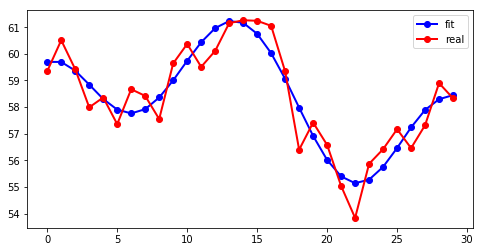

In [15]:
#三项式拟合与真实结果对比，差异较大
import matplotlib.pylab as plt
%matplotlib inline
t = np.arange(len(bhp_close))
plt.figure(figsize=(8,4))

plt.plot(t,vals,"bo-",lw=2.0,label="fit")

plt.plot(t,bhp_close - vale_close,"ro-",lw=2.0,label="real")

plt.legend()

plt.show()

三项式拟合得不算很好。
我们使用 polyfit 函数对数据进行了多项式拟合。我们学习使用 polyval 函数计算多项式的
取值,使用 roots 函数求得多项式函数的根,以及 polyder 函数求解多项式函数的导函数。

本节中的拟合函数有很多可以改进的地方。尝试使用三次方之外的不同指数,或者考虑在
拟合前对数据进行平滑处理。使用移动平均线就是一种数据平滑的方法。计算简单移动平均线
和指数移动平均线的示例可参阅前面的章节。

有效数据个数： 27
针对SMA的3次多项式拟合，与真实值的平均差异率=0.020212(越小越好)，差异率方差=0.014521(越小越好)
针对真实值3次多项式拟合，与真实值的平均差异率=0.017505(越小越好)，差异率方差=0.013528(越小越好)


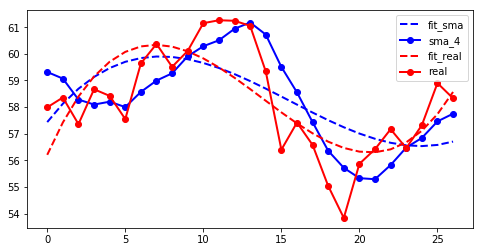

In [16]:
#用一个N次多项式去拟合两只股票收盘价的差价

close=bhp_close-vale_close
M = 4  #用M日SMA均线代替原始收盘价进行多项式拟合
N = 3  #用N次多项式拟合差价


#计算SMA，并将实际值调整至相同维度
t= 
sma= 
real = close[M-1:]
print('有效数据个数：',len(real))

#对sma进行N项式拟合
t = np.arange(len(real))
vals_sma = 

#考虑对真实值的拟合，做对比
#对real进行N项式拟合
vals_real = 

#计算拟合准确程度
diff_sma =np.abs( vals_sma - real) / np.mean(real) #考虑差异比率，而非绝对值
diff_real =np.abs( vals_real - real) / np.mean(real) #考虑差异比率，而非绝对值

print('针对SMA的%d次多项式拟合，与真实值的平均差异率=%f(越小越好)，差异率方差=%f(越小越好)'%(N,np.mean(diff_sma),np.std(diff_sma) ))
print('针对真实值%d次多项式拟合，与真实值的平均差异率=%f(越小越好)，差异率方差=%f(越小越好)'%(N,np.mean(diff_real),np.std(diff_real) ))


import matplotlib.pylab as plt
%matplotlib inline
t = np.arange(len(real))
plt.figure(figsize=(8,4))

plt.plot(t,vals_sma,"b--",lw=2.0,label="fit_sma")

plt.plot(t,sma,"bo-",lw=2.0,label="sma_"+str(M))

plt.plot(t,vals_real,"r--",lw=2.0,label="fit_real")

plt.plot(t,real,"ro-",lw=2.0,label="real")


plt.legend()

plt.show()


## 4.5 净额成交量 OBV

成交量(volume)是投资中一个非常重要的变量,它可以表示价格波动的大小。OBV
(On-Balance Volume,净额成交量或叫能量潮指标)是最简单的股价指标之一,它可以由当日收
盘价、前一天的收盘价以及当日成交量计算得出。这里我们以前一日为基期计算当日的OBV值(可
以认为基期的OBV值为0)。若当日收盘价高于前一日收盘价,则本日OBV等于基期OBV加上当日成交量。若当日收盘价低于前一日收盘价,则本日OBV等于基期OBV减去当日成交量。若当
日收盘价相比前一日没有变化,则当日成交量以0计算。

(1) 把BHP数据分别加载到收盘价和成交量的数组中

为了判断计算中成交量前的正负号,我们先使用diff函数计算收盘价的变化量。


In [17]:
c, v=np.loadtxt('BHP.csv', delimiter=',', usecols=(6, 7), unpack=True)
change = np.diff(c)

(2) NumPy中的 sign 函数可以返回数组中每个元素的正负符号,数组元素为负时返回 -1 ,为
正时返回 1 ,否则返回 0 。

另外,我们也可以使用 piecewise 函数来获取数组元素的正负。顾名思义, piecewise 1 函
数可以分段给定取值。使用合适的返回值和对应的条件调用该函数:

可用“array_equal”检查两次的输出是否一致

In [18]:
#用sign方法获得change的正负符号
signs = 

#用piecewise方法获得change的正负符号
pieces = 
#等价于pieces = np.piecewise(change, [change < 0, change == 0,change > 0], [-1,0, 1])
#change == 0 可以不写，默认不符合条件则为0.

#用array_equal对比两个结果是否相同


True

(3) OBV值的计算依赖于前一日的收盘价,所以在我们的例子中无法计算首日的OBV值

In [19]:
v[1:] * signs

array([ 2620800., -2461300., -3270900.,  2650200., -4667300., -5359800.,
        7768400., -4799100.,  3448300.,  4719800., -3898900.,  3727700.,
        3379400., -2463900., -3590900., -3805000., -3271700., -5507800.,
        2996800., -3434800., -5008300., -7809799.,  3947100.,  3809700.,
        3098200., -3500200.,  4285600.,  3918800., -3632200.])

## 4.7 交易过程模拟

(1) 首先,读入数据

(2) NumPy中的 vectorize 函数相当于Python中的 map 函数。

(3) 我们现在可以先把 func 当做函数来使用。对股价数组使用我们得到的 func 函数

(4) calc_profit 函数非常简单。首先,我们尝试以比开盘价稍低一点的价格买入股票。如果
这个价格不在当日的股价范围内,则尝试买入失败,没有获利,也没有亏损,我们均返回0。否则,
我们将以当日收盘价卖出,所获得的利润即买入和卖出的差价。

In [20]:
N = 1
o, h, l, c = np.loadtxt('BHP.csv', delimiter=',', usecols=(3, 4, 5, 6), unpack=True)

def calc_profit(open, high, low, close):
    # 以比开盘价稍低的价格买入
    buy = open * N
    # daily range
    if low < buy < high :
        return (close - buy)/buy
    else:
        return 0

#用vectorize 构造一个函数指针
func = 

profits = func(o, h, l, c)
                                
print("Profits", profits)

Profits [ 0.00655139  0.01131437  0.00116464  0.00679832  0.01381543  0.00054148
 -0.01105862  0.00467747 -0.00714131  0.00459991 -0.00221496 -0.01872699
  0.00575141  0.0012513  -0.00374532 -0.02113771  0.00661545 -0.00774693
 -0.00775281  0.01529918  0.00964047  0.02802081 -0.01656818  0.00068713
 -0.01083436 -0.00599135 -0.00882682  0.005024    0.00440238  0.00276488]


(5) 在所有交易日中有两个零利润日,即没有利润也没有损失。我们选择非零利润的交易日
并计算平均值:

In [21]:
real_trades =  
real_trades==profits[np.where(profits!=0)]
print("Number of trades",  , ,"%")
print("Average profit/loss %",  )

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

Number of trades 30 100.0 %
Average profit/loss % 0.02


(6) 乐观的人们对于正盈利的交易更感兴趣。选择正盈利的交易日并计算平均利润:

In [22]:
winning_trades =  
print("Number of winning trades",  , , "%" )
print("Average profit %",  )

Number of winning trades 18 60.0 %
Average profit % 0.72


(7) 悲观的人们对于负盈利的交易更感兴趣,选择负盈利的交易日并计算平均损失:

In [23]:
losing_trades =  
print( "Number of losing trades",  , , "%")
print( "Average loss %",  )

Number of losing trades 12 40.0 %
Average loss % -1.01


我们矢量化了一个函数,这是一种可以避免使用循环的技巧。我们使用一个能返回当日相对
利润 的函数来模 拟一个交易 日,并分别 打印出正盈 利和负盈利 交易的概况 。

尽管平均利润为正值,但我们仍需要了解这段过程中是否有长期连续亏损的状况出现。这
一点很重要,因为如果出现了连续亏损,我们可能会面临资本耗尽的情形,那么计算出来的平
均利润就不可信了。
请检查是否出现过这样的连续亏损。如果你乐意,也可以检查是否有长时间的连续盈利。

## 4.9 数据平滑

噪声数据往往很难处理,因此我们通常需要对其进行平滑处理。除了用计算移动平均线的方
法,我们还可以使用NumPy中的一个函数来平滑数据。
hanning 函数是一个加权余弦的窗函数。在后面的章节中,我们还将更为详细地介绍其他窗
函数。

我们将使用 hanning 函数平滑股票收益率的数组,步骤如下。

(1) 调用 hanning 函数计算权重,生成一个长度为 N 的窗口(在这个示例中 N 取8)
:

In [24]:
N = 8
weights = np.hanning(N) #生成权重
print("Weights", weights)

Weights [ 0.          0.1882551   0.61126047  0.95048443  0.95048443  0.61126047
  0.1882551   0.        ]


(2) 使用 convolve 函数计算BHP和VALE的股票收益率,以归一化处理后的 weights 作为参数:

In [25]:
bhp = np.loadtxt('BHP.csv', delimiter=',', usecols=(6,),unpack=True)
bhp_returns = np.diff(bhp) / bhp[ : -1]
smooth_bhp = np.convolve(weights/weights.sum(), bhp_returns) [N-1:-N+1]
vale = np.loadtxt('VALE.csv', delimiter=',', usecols=(6,),unpack=True)
vale_returns = np.diff(vale) / vale[ : -1]
smooth_vale = np.convolve(weights/weights.sum(), vale_returns) [N-1:-N+1]

(3) 用 Matplotlib 绘图:

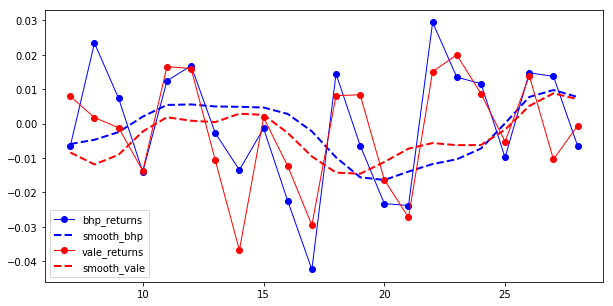

In [26]:


t = np.arange(N - 1, len(bhp_returns))
plt.figure(figsize=[10,5])
plt.plot(t, bhp_returns[N-1:], 'bo-',lw=1.0,label="bhp_returns")
plt.plot(t, smooth_bhp,'b--', lw=2.0,label="smooth_bhp")
plt.plot(t, vale_returns[N-1:], 'ro-',lw=1.0,label="vale_returns")
plt.plot(t, smooth_vale,'r--', lw=2.0,label="smooth_vale")
plt.legend()
plt.show()

图中的细线为股票收益率,粗线为平滑处理后的结果。如你所见,图中的折线有交叉。这些
交叉点很重要,因为它们可能就是股价趋势的转折点,至少可以表明BHP和VALE之间的股价关
系发生了变化。这些转折点可能会经常出现,我们可以利用它们预测未来的股价走势。

(4) 使用多项式拟合平滑后的数据

In [27]:
K = 8
t = np.arange(N - 1, len(bhp_returns))
poly_bhp = np.polyfit(t, smooth_bhp, K)
poly_vale = np.polyfit(t, smooth_vale, K)

(5) 现在,我们需要解出上面的两个多项式何时取值相等,即在哪些地方存在交叉点。这等
价于先对两个多项式函数作差,然后对所得的多项式函数求根。使用 polysub 函数对多项式作差:

In [28]:
poly_sub = np.polysub(poly_bhp, poly_vale)
xpoints = np.roots(poly_sub)
"Intersection points", xpoints

('Intersection points',
 array([ 27.73321598+0.j        ,  27.51284093+0.j        ,
         24.32064343+0.j        ,  18.86423973+0.j        ,
         12.43797190+1.73218179j,  12.43797190-1.73218179j,
          6.34613053+0.62519463j,   6.34613053-0.62519463j]))

(6) 得到的结果为复数,这不利于我们后续处理,除非时间也有实部和虚部。因此,这里需
要用 isreal 函数来判断数组元素是否为实数:

In [29]:
reals = np.isreal(xpoints)
"Real number?", reals

#可以看到有一部分数据为实数,因此我们用 select 函数选出它们。 
#select 函数可以根据一组给定的条件,从一组元素中挑选出符合条件的元素并返回数组:
xpoints = np.select([reals], [xpoints])
xpoints = xpoints.real
"Real intersection points", xpoints

('Real number?',
 array([ True,  True,  True,  True, False, False, False, False], dtype=bool))

('Real intersection points',
 array([ 27.73321598,  27.51284093,  24.32064343,  18.86423973,
          0.        ,   0.        ,   0.        ,   0.        ]))

(7) 我们需要去掉其中为0的元素。 trim_zeros 函数可以去掉一维数组中开头和末尾为0的
元素:

In [30]:
"Sans 0s", np.trim_zeros(xpoints)

('Sans 0s', array([ 27.73321598,  27.51284093,  24.32064343,  18.86423973]))

我们使用 hanning 函数对股票收益率数组进行了平滑处理,使用 polysub 函数对两个多项式
作差运算,以及使用 isreal 函数判断数组元素是否为实数,并用 select 函数选出了实数元素。
最后,我们用 trim_zeros 函数去掉数组首尾的0元素。

请尝试使用其他的平滑函数,如 hamming 、 blackman 、 bartlett 以及 kaiser 。它们的
使用方法和 hanning 函数类似。

## 4.11 本章小结
在本章中,我们使用 corrcoef 函数计算了两只股票收益率的相关性。另外,我们还顺便学
习了 diagonal 和 trace 函数的用法,分别可以给出矩阵的对角线元素和矩阵的迹。
我们使用 polyfit 函数拟合一系列数据点,用 polyval 函数计算多项式函数的取值, roots
函数求解多项式的根,以及 polyder 函数求解多项式函数的导函数。
希望通过本章的内容,可以帮助读者提高工作效率,以便更好地学习下一章中矩阵和通用函
数(ufuncs)的相关内容。